## Gather data from 3 different source
- Download the file from twitter archive and read it in pandas
- Download as image_prediction_tsv using request library from url: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv
- Gather data from twitter account we rate dogs by using Tweepy library in json as tweet_json.text

In [1]:
#### install tweepy library
!pip install -U tweepy==4.0

In [2]:
#### Importing libraries
import pandas as pd
import tweepy
import requests
import numpy as np
import json

In [3]:
# Reading archived csv file downloaded from Udacity page
df_archive = pd.read_csv("twitter-archive-enhanced.csv")
df_archive.head()


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [4]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [5]:
# Gathering data from the url and saving the file as tsv
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)
with open("image_prediction.tsv", mode = "wb" ) as file:
    file.write(response.content)

In [6]:
# Reading the tsv file extracted above in pandas dataframe
df_image = pd.read_csv("image_prediction.tsv", sep="\t")
df_image.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [8]:
# Changing the file into data frame so that we can join the file later on
df = pd.DataFrame(df_image)

df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [9]:
df_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [10]:
tweet_ids = df_archive.tweet_id.values
len(tweet_ids)

2356

In [11]:
%%time

import json

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
# Save each tweet's returned JSON as a new line in a .txt file
with open("tweet_json.txt", "w") as outfile:
   
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode="extended")
            json.dump(tweet._json, outfile)
            print("Success")
            outfile.write('\n')
        except Exception as e:
            print("Fail")
            fails_dict[tweet_id] = e
        

print(fails_dict)


1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

Fail
262: 842846295480000512
Success
263: 842765311967449089
Success
264: 842535590457499648
Success
265: 842163532590374912
Success
266: 842115215311396866
Success
267: 841833993020538882
Success
268: 841680585030541313
Success
269: 841439858740625411
Success
270: 841320156043304961
Success
271: 841314665196081154
Success
272: 841077006473256960
Success
273: 840761248237133825
Success
274: 840728873075638272
Success
275: 840698636975636481
Success
276: 840696689258311684
Success
277: 840632337062862849
Success
278: 840370681858686976
Success
279: 840268004936019968
Success
280: 839990271299457024
Success
281: 839549326359670784
Success
282: 839290600511926273
Fail
283: 839239871831150596
Success
284: 838952994649550848
Success
285: 838921590096166913
Success
286: 838916489579200512
Success
287: 838831947270979586
Success
288: 838561493054533637
Success
289: 838476387338051585
Success
290: 838201503651401729
Success
291: 838150277551247360
Success
292: 838085839343206401
Success
293: 8

Success
519: 810657578271330305
Success
520: 810284430598270976
Success
521: 810254108431155201
Success
522: 809920764300447744
Success
523: 809808892968534016
Success
524: 809448704142938112
Success
525: 809220051211603969
Success
526: 809084759137812480
Success
527: 808838249661788160
Success
528: 808733504066486276
Success
529: 808501579447930884
Success
530: 808344865868283904
Success
531: 808134635716833280
Success
532: 808106460588765185
Success
533: 808001312164028416
Success
534: 807621403335917568
Success
535: 807106840509214720
Success
536: 807059379405148160
Success
537: 807010152071229440
Success
538: 806629075125202948
Success
539: 806620845233815552
Success
540: 806576416489959424
Success
541: 806542213899489280
Success
542: 806242860592926720
Success
543: 806219024703037440
Success
544: 805958939288408065
Success
545: 805932879469572096
Success
546: 805826884734976000
Success
547: 805823200554876929
Success
548: 805520635690676224
Success
549: 805487436403003392
Success


Success
776: 776201521193218049
Success
777: 776113305656188928
Success
778: 776088319444877312
Success
779: 775898661951791106
Success
780: 775842724423557120
Success
781: 775733305207554048
Success
782: 775729183532220416
Success
783: 775364825476165632
Success
784: 775350846108426240
Success
785: 775096608509886464
Fail
786: 775085132600442880
Success
787: 774757898236878852
Success
788: 774639387460112384
Success
789: 774314403806253056
Success
790: 773985732834758656
Success
791: 773922284943896577
Success
792: 773704687002451968
Success
793: 773670353721753600
Success
794: 773547596996571136
Success
795: 773336787167145985
Success
796: 773308824254029826
Success
797: 773247561583001600
Success
798: 773191612633579521
Success
799: 772877495989305348
Success
800: 772826264096874500
Success
801: 772615324260794368
Success
802: 772581559778025472
Success
803: 772193107915964416
Success
804: 772152991789019136
Success
805: 772117678702071809
Success
806: 772114945936949249
Success
807

Rate limit reached. Sleeping for: 689


Success
901: 758740312047005698
Success
902: 758474966123810816
Success
903: 758467244762497024
Success
904: 758405701903519748
Success
905: 758355060040593408
Success
906: 758099635764359168
Success
907: 758041019896193024
Success
908: 757741869644341248
Success
909: 757729163776290825
Success
910: 757725642876129280
Success
911: 757611664640446465
Success
912: 757597904299253760
Success
913: 757596066325864448
Success
914: 757400162377592832
Success
915: 757393109802180609
Success
916: 757354760399941633
Success
917: 756998049151549440
Success
918: 756939218950160384
Success
919: 756651752796094464
Success
920: 756526248105566208
Success
921: 756303284449767430
Success
922: 756288534030475264
Success
923: 756275833623502848
Success
924: 755955933503782912
Success
925: 755206590534418437
Success
926: 755110668769038337
Success
927: 754874841593970688
Success
928: 754856583969079297
Success
929: 754747087846248448
Success
930: 754482103782404096
Success
931: 754449512966619136
Success


Success
1153: 725786712245440512
Success
1154: 725729321944506368
Success
1155: 725458796924002305
Success
1156: 724983749226668032
Success
1157: 724771698126512129
Success
1158: 724405726123311104
Success
1159: 724049859469295616
Success
1160: 724046343203856385
Success
1161: 724004602748780546
Success
1162: 723912936180330496
Success
1163: 723688335806480385
Success
1164: 723673163800948736
Success
1165: 723179728551723008
Success
1166: 722974582966214656
Success
1167: 722613351520608256
Success
1168: 721503162398597120
Success
1169: 721001180231503872
Success
1170: 720785406564900865
Success
1171: 720775346191278080
Success
1172: 720415127506415616
Success
1173: 720389942216527872
Success
1174: 720340705894408192
Success
1175: 720059472081784833
Success
1176: 720043174954147842
Success
1177: 719991154352222208
Success
1178: 719704490224398336
Success
1179: 719551379208073216
Success
1180: 719367763014393856
Success
1181: 719339463458033665
Success
1182: 719332531645071360
Success
11

Success
1402: 699434518667751424
Success
1403: 699423671849451520
Success
1404: 699413908797464576
Success
1405: 699370870310113280
Success
1406: 699323444782047232
Success
1407: 699088579889332224
Success
1408: 699079609774645248
Success
1409: 699072405256409088
Success
1410: 699060279947165696
Success
1411: 699036661657767936
Success
1412: 698989035503689728
Success
1413: 698953797952008193
Success
1414: 698907974262222848
Success
1415: 698710712454139905
Success
1416: 698703483621523456
Success
1417: 698635131305795584
Success
1418: 698549713696649216
Success
1419: 698355670425473025
Success
1420: 698342080612007937
Success
1421: 698262614669991936
Success
1422: 698195409219559425
Success
1423: 698178924120031232
Success
1424: 697995514407682048
Success
1425: 697990423684476929
Success
1426: 697943111201378304
Success
1427: 697881462549430272
Success
1428: 697630435728322560
Success
1429: 697616773278015490
Success
1430: 697596423848730625
Success
1431: 697575480820686848
Success
14

Success
1651: 683515932363329536
Success
1652: 683498322573824003
Success
1653: 683481228088049664
Success
1654: 683462770029932544
Success
1655: 683449695444799489
Success
1656: 683391852557561860
Success
1657: 683357973142474752
Success
1658: 683142553609318400
Success
1659: 683111407806746624
Success
1660: 683098815881154561
Success
1661: 683078886620553216
Success
1662: 683030066213818368
Success
1663: 682962037429899265
Success
1664: 682808988178739200
Success
1665: 682788441537560576
Success
1666: 682750546109968385
Success
1667: 682697186228989953
Success
1668: 682662431982772225
Success
1669: 682638830361513985
Success
1670: 682429480204398592
Success
1671: 682406705142087680
Success
1672: 682393905736888321
Success
1673: 682389078323662849
Success
1674: 682303737705140231
Success
1675: 682259524040966145
Success
1676: 682242692827447297
Success
1677: 682088079302213632
Success
1678: 682059653698686977
Success
1679: 682047327939461121
Success
1680: 682032003584274432
Success
16

Rate limit reached. Sleeping for: 678


Success
1801: 676975532580409345
Success
1802: 676957860086095872
Success
1803: 676949632774234114
Success
1804: 676948236477857792
Success
1805: 676946864479084545
Success
1806: 676942428000112642
Success
1807: 676936541936185344
Success
1808: 676916996760600576
Success
1809: 676897532954456065
Success
1810: 676864501615042560
Success
1811: 676821958043033607
Success
1812: 676819651066732545
Success
1813: 676811746707918848
Success
1814: 676776431406465024
Success
1815: 676617503762681856
Success
1816: 676613908052996102
Success
1817: 676606785097199616
Success
1818: 676603393314578432
Success
1819: 676593408224403456
Success
1820: 676590572941893632
Success
1821: 676588346097852417
Success
1822: 676582956622721024
Success
1823: 676575501977128964
Success
1824: 676533798876651520
Success
1825: 676496375194980353
Success
1826: 676470639084101634
Success
1827: 676440007570247681
Success
1828: 676430933382295552
Success
1829: 676263575653122048
Success
1830: 676237365392908289
Success
18

Success
2050: 671504605491109889
Success
2051: 671497587707535361
Success
2052: 671488513339211776
Success
2053: 671486386088865792
Success
2054: 671485057807351808
Success
2055: 671390180817915904
Success
2056: 671362598324076544
Success
2057: 671357843010908160
Success
2058: 671355857343524864
Success
2059: 671347597085433856
Success
2060: 671186162933985280
Success
2061: 671182547775299584
Success
2062: 671166507850801152
Success
2063: 671163268581498880
Success
2064: 671159727754231808
Success
2065: 671154572044468225
Success
2066: 671151324042559489
Success
2067: 671147085991960577
Success
2068: 671141549288370177
Success
2069: 671138694582165504
Success
2070: 671134062904504320
Success
2071: 671122204919246848
Success
2072: 671115716440031232
Success
2073: 671109016219725825
Success
2074: 670995969505435648
Success
2075: 670842764863651840
Success
2076: 670840546554966016
Success
2077: 670838202509447168
Success
2078: 670833812859932673
Success
2079: 670832455012716544
Success
20

Success
2299: 667070482143944705
Success
2300: 667065535570550784
Success
2301: 667062181243039745
Success
2302: 667044094246576128
Success
2303: 667012601033924608
Success
2304: 666996132027977728
Success
2305: 666983947667116034
Success
2306: 666837028449972224
Success
2307: 666835007768551424
Success
2308: 666826780179869698
Success
2309: 666817836334096384
Success
2310: 666804364988780544
Success
2311: 666786068205871104
Success
2312: 666781792255496192
Success
2313: 666776908487630848
Success
2314: 666739327293083650
Success
2315: 666701168228331520
Success
2316: 666691418707132416
Success
2317: 666649482315059201
Success
2318: 666644823164719104
Success
2319: 666454714377183233
Success
2320: 666447344410484738
Success
2321: 666437273139982337
Success
2322: 666435652385423360
Success
2323: 666430724426358785
Success
2324: 666428276349472768
Success
2325: 666421158376562688
Success
2326: 666418789513326592
Success
2327: 666411507551481857
Success
2328: 666407126856765440
Success
23

In [13]:
print(len(fails_dict))

31


In [14]:
# Making accesible the file downloaded from twitter into readable json format
json_df = pd.read_json("tweet_json.txt", lines=True, encoding= "utf-8")
json_df = json_df.rename(columns={"id": "tweet_id"})
json_df = json_df[["tweet_id", "retweet_count", "favorite_count"]]
json_df


,tweet_id,retweet_count,favorite_count
0,892420643555336193,6886,32924
1,892177421306343426,5184,28462
2,891815181378084864,3424,21382
3,891689557279858688,7097,35910
4,891327558926688256,7616,34326
...,...,...,...
2320,666049248165822465,36,86
2321,666044226329800704,113,243
2322,666033412701032449,35,98
2323,666029285002620928,39,111


### Now we have all three files gathered from various source namely
- twitter-archive-enhanced.csv as df_archive
- image_prediction.tsv as df_image
- tweet_json.txt as json_df

#### Now I have to join all these tables 
- The left join will work to gather all the data from the tables on "tweet_id" as a common column as joining point.

In [15]:
# Joining the data through left join on tweet_id 
twitter_data = pd.merge(df_archive, json_df, how="left", on= "tweet_id")
twitter_data = twitter_data.merge(df_image, how="left", on="tweet_id")

In [16]:
twitter_data.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,1.0,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,2.0,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


## Accessing the data

In [17]:
pd.set_option('display.max_columns', 600)
pd.set_option('max_colwidth', 800)
twitter_data

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None,6886.0,32924.0,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None,5184.0,28462.0,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None,3424.0,21382.0,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None,7097.0,35910.0,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None,7616.0,34326.0,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5,10,None,None,None,None,None,36.0,86.0,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1.0,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,NaN,NaN,

In [18]:
twitter_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [19]:
twitter_data.tail(30)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2326,666411507551481857,NaN,NaN,2015-11-17 00:24:19 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is quite the dog. Gets really excited when not in water. Not very soft tho. Bad at fetch. Can't do tricks. 2/10 https://t.co/aMCTNWO94t,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666411507551481857/photo/1,2,10,quite,None,None,None,None,258.0,366.0,https://pbs.twimg.com/media/CT-RugiWIAELEaq.jpg,1.0,coho,0.404640,False,barracouta,0.271485,False,gar,0.189945,False
2327,666407126856765440,NaN,NaN,2015-11-17 00:06:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a southern Vesuvius bumblegruff. Can drive a truck (wow). Made friends with 5 other nifty dogs (neat). 7/10 https://t.co/LopTBkKa8h,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666407126856765440/photo/1,7,10,a,None,None,None,None,30.0,93.0,https://pbs.twimg.com/media/CT-NvwmW4AAugGZ.jpg,1.0,black-and-tan_coonhound,0.529139,True,bloodhound,0.244220,True,flat-coated_retriever,0.173810,True
2328,666396247373291520,NaN,NaN,2015-11-16 23:23:41 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Oh goodness. A super rare northeast Qdoba kangaroo mix. Massive feet. No pouch (disappointing). Seems alert. 9/10 https://t.co/Dc7b0E8qFE,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666396247373291520/photo/1,9,10,None,None,None,None,None,66.0,146.0,https://pbs.twimg.com/media/CT-D2ZHWIAA3gK1.jpg,1.0,Chihuahua,0.978108,True,toy_terrier,0.009397,True,papillon,0.004577,True
2329,666373753744588802,NaN,NaN,2015-11-16 21:54:18 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Those are sunglasses and a jean jacket. 11/10 dog cool af https://t.co/uHXrPkUEyl,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666373753744588802/photo/1,11,10,None,None,None,None,None,73.0,159.0,https://pbs.twimg.com/media/CT9vZEYWUAAlZ05.jpg,1.0,soft-coated_wheaten_terrier,0.326467,True,Afghan_hound,0.259551,True,briard,0.206803,True
2330,666362758909284353,NaN,NaN,2015-11-16 21:10:36 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Unique dog here. Very small. Lives in container of Frosted Flakes (?). Short legs. Must be rare 6/10 would still pet https://t.co/XMD9CwjEnM,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666362758909284353/photo/1,6,10,None,None,None,None,None,464.0,643.0,https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg,1.0,guinea_pig,0.996496,False,skunk,0.002402,False,hamster,0.000461,False
2331,666353288456101888,NaN,NaN,2015-11-16 20:32:58 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a mixed Asiago from the Galápagos Islands. Only one ear working. Big fan of marijuana carpet. 8/10 https://t.co/tltQ5w9aUO,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666353288456101888/photo/1,8,10,None,None,None,None,None,56.0,172.0,https://pbs.twimg.com/media/CT9cx0tUEAAhNN_.jpg,1.0,malamute,0.336874,True,Siberian_husky,0.147655,True,Eskimo_dog,0.093412,True
2332,666345417576210432,NaN,NaN,2015-11-16 20:01:42 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Look at this jokester thinking seat belt laws don't apply to him. Great tongue tho 10/10 https://t.co/VFKG1vxGjB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666345417576210432/photo/1,10,10,None,None,None,None,None,121.0,233.0,https://pbs.twimg.com/media/CT9Vn7PWoAA_ZCM.jpg,1.0,golden_retriever,0.858744,True,Chesapeake_Bay_retriever,0.054787,True,Labrador_retriever,0.014

In [20]:
twitter_data.value_counts("source")

source
<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
dtype: int64

In [21]:

twitter_data.value_counts("name")

name
None        745
a            55
Charlie      12
Cooper       11
Oliver       11
           ... 
Kramer        1
Cheesy        1
Chaz          1
Kulet         1
Kingsley      1
Length: 957, dtype: int64

In [22]:
twitter_data.value_counts("retweet_count")

retweet_count
557.0      5
50.0       5
184.0      5
180.0      5
597.0      5
          ..
1128.0     1
1127.0     1
1125.0     1
1119.0     1
69479.0    1
Length: 1651, dtype: int64

In [23]:
twitter_data.value_counts("p3")

p3
Labrador_retriever    79
Chihuahua             58
golden_retriever      48
Eskimo_dog            38
kelpie                35
                      ..
ibex                   1
jaguar                 1
jeep                   1
jersey                 1
zebra                  1
Length: 408, dtype: int64

In [24]:
twitter_data.sample(20)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2221,668480044826800133,NaN,NaN,2015-11-22 17:23:57 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to DayZ. She is definitely stuck on that stair. Just looking for someone to help her. 11/10 I would help https://t.co/be3zMW0Qj5,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668480044826800133/photo/1,11,10,DayZ,None,None,None,None,125.0,382.0,https://pbs.twimg.com/media/CUbrDWOWcAEyMdM.jpg,1.0,Arctic_fox,0.119243,False,Labrador_retriever,0.099965,True,pug,0.086717,True
1438,696900204696625153,NaN,NaN,2016-02-09 03:35:31 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Rosie. She's a Benebark Cumberpatch. Sleepy af. 12/10 would snug for days https://t.co/NKuON5Al8i,NaN,NaN,NaN,https://twitter.com/dog_rates/status/696900204696625153/photo/1,12,10,Rosie,None,None,None,None,915.0,2864.0,https://pbs.twimg.com/media/CavjCdJW0AIB5Oz.jpg,1.0,Chihuahua,0.297735,True,Pembroke,0.266953,True,basenji,0.136814,True
670,789986466051088384,NaN,NaN,2016-10-23 00:27:05 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Happy. He's a bathtub reviewer. Seems to be pleased with this one. 12/10 https://t.co/Ln89R4FP7v,NaN,NaN,NaN,https://twitter.com/dog_rates/status/789986466051088384/photo/1,12,10,Happy,None,None,None,None,2108.0,8601.0,https://pbs.twimg.com/media/CvaYgDOWgAEfjls.jpg,1.0,tub,0.479477,False,bathtub,0.325106,False,golden_retriever,0.078530,True
1555,688894073864884227,NaN,NaN,2016-01-18 01:22:00 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Hamrick. He's covered in corn flakes. Silly pupper. Looks congested. 7/10 considerably petable https://t.co/ROPZcAMQKI,NaN,NaN,NaN,https://twitter.com/dog_rates/status/688894073864884227/photo/1,7,10,Hamrick,None,None,pupper,None,613.0,2023.0,https://pbs.twimg.com/media/CY9xf1dUAAE4XLc.jpg,1.0,hog,0.669996,False,guinea_pig,0.077347,False,hamster,0.062398,False
1027,746056683365994496,NaN,NaN,2016-06-23 19:05:49 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Arlen and Thumpelina. They are best pals. Cuddly af. 11/10 for both puppers https://t.co/VJgbgIzIHx,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/746056683365994496/photo/1,https://twitter.com/dog_rates/status/746056683365994496/photo/1",11,10,Arlen,None,None,None,None,724.0,3234.0,https://pbs.twimg.com/media/ClqGl7fXIAA8nDe.jpg,1.0,Shetland_sheepdog,0.433320,True,collie,0.335997,True,borzoi,0.177179,True
898,758854675097526272,NaN,NaN,2016-07-29 02:40:28 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Lilli Bee &amp; Honey Bear. Unfortunately, they were both born with no eyes. So heckin sad. Both 11/10 https://t.co/4UrfOZhztW",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/758854675097526272/photo/1,https://twitter.com/dog_rates/status/758854675097526272/photo/1,https://twitter.com/dog_rates/status/758854675097526272/photo/1,https://twitter.com/dog_rates/status/758854675097526272/photo/1",11,10,Lilli,None,None,None,None,826.0,3238.0,https://pbs.twimg.com/media/Cof-SuqVYAAs4kZ.jpg,4.0,barrow,0.974047,False,Old_English_sheepdog,0.023791,True,komondor,0.001246,True
665,790698755171364864,NaN,NaN,2016-10-24 23:37:28 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Mosby. He appears to be rather h*ckin snuggable af. 12/10 keep it up Mosby https://t.co/IiiBq460I7,NaN,NaN,NaN,https://twitter.com/dog_rates/status/790698755171364864/photo/1,1

In [52]:
df = twitter_data[["retweeted_status_id","retweeted_status_user_id","retweeted_status_timestamp", "text"]]
df.sample(10)

,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,text
382,6.946697e+17,4.196984e+09,2016-02-02 23:52:22 +0000,RT @dog_rates: This is Phil. He's an important dog. Can control the seasons. Magical as hell. 12/10 would let him sign my forehead https://…
264,NaN,NaN,NaN,Meet George. He looks slightly deflated but overall quite powerful. Not sure how that human restrained him. 12/10 would snug with permission https://t.co/o6E0hB3xZl
1691,NaN,NaN,NaN,This is Glacier. He's a very happy pup. Loves to sing in the sunlight. 11/10 https://t.co/jTBPqKgkz7
372,NaN,NaN,NaN,Meet Doobert. He's a deaf doggo. Didn't stop him on the field tho. Absolute legend today. 14/10 would pat head approvingly https://t.co/iCk7zstRA9
1619,NaN,NaN,NaN,This is Jerry. He's a neat dog. No legs (tragic). Has more horns than a dog usually does. Bark is unique af. 5/10 https://t.co/85q7xlplsJ
1768,NaN,NaN,NaN,This is Bella. She just learned that her final grade in chem was a 92.49 \npoor pupper 11/10 https://t.co/auOoKuoveM
475,8.159907e+17,4.196984e+09,2017-01-02 18:38:42 +0000,RT @dog_rates: Meet Jack. He's one of the rare doggos that doesn't mind baths. 11/10 click the link to see how you can help Jack!\n\nhttps://…
2277,NaN,NaN,NaN,Never seen this breed before. Very pointy pup. Hurts when you cuddle. Still cute tho. 10/10 https://t.co/97HuBrVuOx
366,8.102541e+17,4.196984e+09,2016-12-17 22:43:27 +0000,"RT @dog_rates: This is Gus. He likes to be close to you, which is good because you want to be close to Gus. 12/10 would boop then pet https…"
18,NaN,NaN,NaN,This is Ralphus. He's powering up. Attempting maximum borkdrive. 13/10 inspirational af https://t.co/YnYAFCTTiK


### Quality Issue
- Stripping off +0000 and the time(I don't think I need it) from the timestamp, retweeted_status_timestamp column
- Changing timestamp column from object to the datetime format
- remove extra characters from the source column, just want the url
- stripping off the rating and the url from the text column
- removing duplicate url in the same row no. 4 (there are multiple rows) of expanded url column
- changing the format of retweet_count favorite_count & img_num column from float to integer
- incorrect and missing dogs name in the name column
- Change the format of in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id from float to integer as there are exponential numbers in the columns
- Keep an eye on favorite_count column, there are few rows with 0 value
- Missing data- retweet_count, favorite_count has 31 missing values, jpg_url has 281 missing values.
- Check for expanded_urls, value_count is 2218 while info is showing 2297 rows
- Replace None with NaN in the name of dog, doggo, floofer, pupper, puppo column
- Replace 0.0 with NaN in favorite_count column
- Capitalize first alphabet on each column of p1, p2, p3
- There are some rows with different denominater value, make it constant equals to 10
- Remove all the retweet rows by removing all non-null values of retweeted_status_id,retweeted_status_user_id, retweeted_status_timestamp	


### Tidiness Issue

- Make 2 columns for text, where one is just clean text and other column for a  url in that text 
- Remove img_num column as it doesn't make sense as of now
- Check all the urls, those which are repeated or doesn't make sense, we can remove it
- Combine doggo, floofer, pupper, puppo into 1 column

## Cleaning the Data
### Quality Issue

In [301]:
# Make a copy of data set
twitter_clean_data = twitter_data.copy()

#### Define:
- Stripping off time from timestamp and retweeted_status_timestamp column.
- Using strftime function, strip of extra time format and just add date in these columns

##### Code:

In [302]:
twitter_clean_data["timestamp"] = pd.to_datetime(twitter_clean_data["timestamp"], errors='coerce')
twitter_clean_data["retweeted_status_timestamp"] = pd.to_datetime(twitter_clean_data["retweeted_status_timestamp"], errors='coerce')

In [303]:
from datetime import datetime
twitter_clean_data["timestamp"]= twitter_clean_data["timestamp"].dt.strftime( '%Y-%m-%d')
twitter_clean_data["retweeted_status_timestamp"]= twitter_clean_data["retweeted_status_timestamp"].dt.strftime( '%Y-%m-%d')

##### Test

In [304]:
twitter_clean_data[["timestamp" ,"retweeted_status_timestamp"]].sample(10)

,timestamp,retweeted_status_timestamp
2119,2015-11-28,NaN
112,2017-06-03,NaN
1889,2015-12-10,NaN
624,2016-11-07,NaN
1348,2016-02-29,NaN
507,2016-12-24,NaN
1386,2016-02-19,NaN
1245,2016-03-21,NaN
771,2016-09-16,NaN
1923,2015-12-08,NaN


#### Define:
- Removing extra chars from the text by using split and regex function 

##### Code:

In [305]:
twitter_clean_data["text"] = twitter_clean_data["text"].str.split("\d+/").str[0]

##### Test

In [306]:
twitter_clean_data["text"].sample(10)

1090    We only rate dogs. Pls stop sending in non-canines like this Slovak Car Bunny. It makes my job very difficult. 
2182                This is Harrison. He braves the snow like a champ. Perched at all times. Hasn't blinked in months. 
405                                                                  This is Cash. He's officially given pup on today. 
1503    This is Kingsley Wellensworth III. He owns 7 range rovers. Has a cardigan collection. Would rather be sailing. 
700                           This is Mattie. She's extremely dangerous. Will bite your h*ckin finger right off. Still 
1398                    Meet Fillup. Spaghetti is his main weakness. Also pissed because he's rewarded with cat treats 
1641        Heartwarming scene of two pups that want nothing more than to be together. Touching af. Great tongue. Both 
2000                               This is Jackie. She was all ready to go out, but her friends just cancelled on her. 
2138                                    

#### Define:
- Removing duplicate url in the same column by using split function 

##### Code:

In [307]:
twitter_clean_data["expanded_urls"] = twitter_clean_data["expanded_urls"].str.split("," ).str[0]

##### Test

In [308]:
twitter_clean_data["expanded_urls"].sample(10)

1959    https://twitter.com/dog_rates/status/673576835670777856/photo/1
258     https://twitter.com/dog_rates/status/843604394117681152/photo/1
1174    https://twitter.com/dog_rates/status/720059472081784833/photo/1
728     https://twitter.com/dog_rates/status/707610948723478529/photo/1
1475    https://twitter.com/dog_rates/status/693642232151285760/photo/1
1910    https://twitter.com/dog_rates/status/674416750885273600/photo/1
834     https://twitter.com/dog_rates/status/768473857036525572/photo/1
523     https://twitter.com/dog_rates/status/809448704142938112/photo/1
877     https://twitter.com/dog_rates/status/760893934457552897/photo/1
1030    https://twitter.com/dog_rates/status/745433870967832576/photo/1
Name: expanded_urls, dtype: object

#### Define:
- changing the format of retweet_count favorite_count & img_num column from float to integer
- changing the format of in_reply_to_status_id, in_reply_to_user_id, column from float to integer
- Fill the NaN values with '0', then convert into integer format 
##### Code:

In [309]:
twitter_clean_data["retweet_count"] = twitter_clean_data['retweet_count'].fillna(0).apply(int)
twitter_clean_data["favorite_count"] = twitter_clean_data["favorite_count"].fillna(0).apply(int)
twitter_clean_data["img_num"] = twitter_clean_data["img_num"].fillna(0).apply(int)

In [310]:
twitter_clean_data["in_reply_to_status_id"] = twitter_clean_data['in_reply_to_status_id'].fillna(0).apply(int)
twitter_clean_data["in_reply_to_user_id"] = twitter_clean_data['in_reply_to_user_id'].fillna(0).apply(int)

##### Test

In [311]:
twitter_clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       2356 non-null   int64  
 2   in_reply_to_user_id         2356 non-null   int64  
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [312]:
twitter_clean_data[["retweet_count","favorite_count", "retweeted_status_id"]].sample(10)

,retweet_count,favorite_count,retweeted_status_id
2232,169,443,NaN
2092,645,1316,NaN
383,2024,9736,NaN
1424,1156,2963,NaN
2234,169,563,NaN
2177,260,561,NaN
1778,1806,4300,NaN
443,1101,6660,NaN
463,13360,31164,NaN
1144,733,2749,NaN


#### Define:
- Capitalize first letter of names in p1,p2,p3  using string.capitalize()

##### Code:

In [313]:
twitter_clean_data["p1"] = twitter_clean_data["p1"].str.capitalize()
twitter_clean_data["p2"] = twitter_clean_data["p2"].str.capitalize()
twitter_clean_data["p3"] = twitter_clean_data["p3"].str.capitalize()                   

##### Test

In [314]:
twitter_clean_data[["p1","p2","p3"]].sample(10)

,p1,p2,p3
966,Border_collie,Collie,Papillon
36,Labrador_retriever,Seat_belt,Pug
1372,Golden_retriever,Chow,Cocker_spaniel
694,NaN,NaN,NaN
1977,Lakeland_terrier,West_highland_white_terrier,Wire-haired_fox_terrier
1786,Patio,Folding_chair,Parallel_bars
878,Golden_retriever,Labrador_retriever,Redbone
2329,Soft-coated_wheaten_terrier,Afghan_hound,Briard
590,Malamute,Siberian_husky,Eskimo_dog
642,Doormat,French_bulldog,Boston_bull


#### Define:
- Round off p1_config, p2_config, p3_config to 1 decimal point

##### Code:

In [315]:
twitter_clean_data["p1_conf"] = round(twitter_clean_data["p1_conf"],2)
twitter_clean_data["p2_conf"] = round(twitter_clean_data["p2_conf"],2)
twitter_clean_data["p3_conf"] = round(twitter_clean_data["p3_conf"],2)

##### Test

In [316]:
twitter_clean_data[["p1_conf","p2_conf","p3_conf"]].sample(10)

,p1_conf,p2_conf,p3_conf
584,0.94,0.03,0.02
1076,0.93,0.04,0.01
1563,0.81,0.02,0.02
1794,0.42,0.03,0.03
1323,0.74,0.11,0.05
1777,0.20,0.15,0.11
2200,0.32,0.10,0.09
416,0.66,0.08,0.06
200,0.35,0.18,0.13
1655,0.99,0.00,0.00


#### Define:
- Check the names of dogs in the name, doggo, floofer, pupper, puppo column and replace None and other non_name to blank space using replace function (needed for cleaning in tidiness issue)
- But I can't change the names of the dog in the name column with wrong names eg. a, not (these are not names just random alphabets)

##### Code:

In [317]:
twitter_clean_data["name"] = twitter_clean_data["name"].replace(to_replace=["None"], value="")
twitter_clean_data["doggo"] = twitter_clean_data["doggo"].replace(to_replace=["None"], value="")
twitter_clean_data["pupper"] = twitter_clean_data["pupper"].replace(to_replace=["None"], value="")
twitter_clean_data["floofer"] = twitter_clean_data["floofer"].replace(to_replace=["None"], value="")
twitter_clean_data["puppo"] = twitter_clean_data["puppo"].replace(to_replace=["None"], value="")

##### Test

In [318]:
twitter_clean_data[["name","doggo","pupper","floofer","puppo"]].sample(10)

,name,doggo,pupper,floofer,puppo
1137,Raymond,,,,
95,Walter,,,,
298,,,,,
5,,,,,
697,Dale,,,,
9,Cassie,doggo,,,
1987,Oscar,,,,
475,Jack,,,,
1330,,,pupper,,
2253,,,,,


#### Define:
- There are some rows with different denominater value, make it constant equals to 10 by using apply method

##### Code:

In [319]:
twitter_clean_data["rating_denominator"] = twitter_clean_data["rating_denominator"].apply(lambda x: 10)

##### Test

In [320]:
twitter_clean_data["rating_denominator"].value_counts()

10    2356
Name: rating_denominator, dtype: int64

#### Define:
- Remove all retweeted rows from the text columns by removing all rows with non-null values from retweeted_status_id (the other columns namely retweeted_status_user_id, retweeted_status_timestamp has same rows with non-null values with retweeted_status_id) by firstly finding all non-null values and df.index attributes to the list of all rows in other columns. Then by using drop function, drop all the rows.

##### code:

In [341]:
# Get a list of the row indices to delete
to_delete = twitter_clean_data[twitter_clean_data['retweeted_status_id'].notnull()].index

# Delete the rows from the DataFrame
twitter_clean_data = twitter_clean_data.drop(to_delete, axis=0)

##### Test:

In [342]:
twitter_clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2175 non-null   int64  
 1   in_reply_to_status_id       2175 non-null   int64  
 2   in_reply_to_user_id         2175 non-null   int64  
 3   timestamp                   2175 non-null   object 
 4   source                      2175 non-null   object 
 5   text                        2175 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2117 non-null   object 
 10  rating_numerator            2175 non-null   int64  
 11  rating_denominator          2175 non-null   int64  
 12  name                        1495 non-null   object 
 13  doggo                       2175 

### Tidiness Issue

#### Define:
- Remove img_num column by using drop function

##### Code:

In [323]:
twitter_clean_data = twitter_clean_data.drop(columns=["img_num"])

##### Test

In [324]:
twitter_clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2175 non-null   int64  
 1   in_reply_to_status_id       2175 non-null   int64  
 2   in_reply_to_user_id         2175 non-null   int64  
 3   timestamp                   2175 non-null   object 
 4   source                      2175 non-null   object 
 5   text                        2175 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2117 non-null   object 
 10  rating_numerator            2175 non-null   int64  
 11  rating_denominator          2175 non-null   int64  
 12  name                        2175 non-null   object 
 13  doggo                       2175 

#### Define:
- Join the doggo, floofer, pupper, puppo columns into a new column name called dog_name using join method 
- Then replace the blank space with Nan

##### Code:

In [325]:
# Combining all rows 
twitter_clean_data["dog_size"] = twitter_clean_data[["doggo", "floofer", "pupper", "puppo"]].apply(lambda row: "".join(row.astype(str)), axis=1)
# Replacing blank space with Nan
twitter_clean_data["dog_size"] = twitter_clean_data["dog_size"].replace(to_replace=[""], value=np.nan)
twitter_clean_data["name"] = twitter_clean_data["name"].replace(to_replace=[""], value=np.nan)

##### Test

In [326]:
twitter_clean_data["dog_size"].sample(10)

1478    pupper
1343    pupper
1561       NaN
888        NaN
1019       NaN
2151       NaN
344      doggo
1791       NaN
1014       NaN
2348       NaN
Name: dog_size, dtype: object

## Storing the data
- Store the data in csv file as "twitter_archive_master.csv"

In [327]:
twitter_clean_data.to_csv("twitter_archive_master.csv", index=False)

In [328]:
twitter_archive_master = pd.read_csv("twitter_archive_master.csv")

In [329]:
twitter_archive_master.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_size
0,892420643555336193,0,0,2017-08-01,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut.,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,NaN,NaN,NaN,NaN,6886,32924,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,Orange,0.10,False,Bagel,0.09,False,Banana,0.08,False,NaN
1,892177421306343426,0,0,2017-08-01,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit.",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,NaN,NaN,NaN,NaN,5184,28462,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.32,True,Pekinese,0.09,True,Papillon,0.07,True,NaN
2,891815181378084864,0,0,2017-07-31,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike.,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,NaN,NaN,NaN,NaN,3424,21382,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.72,True,Malamute,0.08,True,Kelpie,0.03,True,NaN
3,891689557279858688,0,0,2017-07-30,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal.,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,NaN,NaN,NaN,NaN,7097,35910,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,Paper_towel,0.17,False,Labrador_retriever,0.17,True,Spatula,0.04,False,NaN
4,891327558926688256,0,0,2017-07-29,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such.",NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558926688256/photo/1,12,10,Franklin,NaN,NaN,NaN,NaN,7616,34326,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,Basset,0.56,True,English_springer,0.23,True,German_short-haired_pointer,0.18,True,NaN


## Analysis

### Insight #1
- Calculating the percent of top breeds of dog in each columns of p1, p2, p3

In [330]:
# Check the top breeds of dog in each p1, p2, p3
twitter_archive_master[["p1","p2","p3"]].describe()

,p1,p2,p3
count,1994,1994,1994
unique,374,400,405
top,Golden_retriever,Labrador_retriever,Labrador_retriever
freq,139,96,76


In [331]:
# No. of top dog breeds in each p1, p2, p3 column
dog_breed_1= twitter_archive_master["p1"].value_counts()["Golden_retriever"]
dog_breed_2= twitter_archive_master["p2"].value_counts()["Labrador_retriever"]
dog_breed_3= twitter_archive_master["p3"].value_counts()["Labrador_retriever"]
print(dog_breed_1,dog_breed_2,dog_breed_3)

139 96 76


In [332]:
# Total number of non_null values
p1_count=twitter_archive_master["p1"].count()
p2_count=twitter_archive_master["p2"].count()
p3_count=twitter_archive_master["p3"].count()
print(p1_count,p2_count,p3_count)

1994 1994 1994


In [333]:
# percent of dog breeds
df_percent_p1 = dog_breed_1/p1_count
df_percent_p2 = dog_breed_2/p2_count
df_percent_p3 = dog_breed_3/p3_count
print(f"The total percent of Golden Retreiver in p1 is: {round(df_percent_p1,2)}\n"
     f"The total percent of Labrador Retriever in p2 is: {round(df_percent_p2,2)}\n"
     f"The total percent of Labrador Retriever in p3 is: {round(df_percent_p3,2)}")

The total percent of Golden Retreiver in p1 is: 0.07
The total percent of Labrador Retriever in p2 is: 0.05
The total percent of Labrador Retriever in p3 is: 0.04


### Insight #2
- Calculating the most favorite count

In [334]:
most_liked = twitter_archive_master['favorite_count'].idxmax()

# Select the rows of interest using the index
selected_rows = twitter_archive_master.loc[most_liked, ["favorite_count","tweet_id", "expanded_urls", "jpg_url", "rating_numerator"]]

# Print the selected rows
print(selected_rows)

favorite_count                                                                                       141848
tweet_id                                                                                 744234799360020481
expanded_urls                               https://twitter.com/dog_rates/status/744234799360020481/video/1
jpg_url             https://pbs.twimg.com/ext_tw_video_thumb/744234667679821824/pu/img/1GaWmtJtdqzZV7jy.jpg
rating_numerator                                                                                         13
Name: 862, dtype: object


### Insight #3
- Calculating the maximum retweeted count

In [335]:
most_retweet = twitter_archive_master['retweet_count'].idxmax()

# Select the rows of interest using the index
selected_rows = twitter_archive_master.loc[most_liked, ["retweet_count","tweet_id", "expanded_urls", "jpg_url", "rating_numerator"]]

# Print the selected rows
print(selected_rows)

retweet_count                                                                                         69479
tweet_id                                                                                 744234799360020481
expanded_urls                               https://twitter.com/dog_rates/status/744234799360020481/video/1
jpg_url             https://pbs.twimg.com/ext_tw_video_thumb/744234667679821824/pu/img/1GaWmtJtdqzZV7jy.jpg
rating_numerator                                                                                         13
Name: 862, dtype: object


## Visualization

### Creating a pie chart showing Percentage of top dog breeds in each column of p1, p2, p3

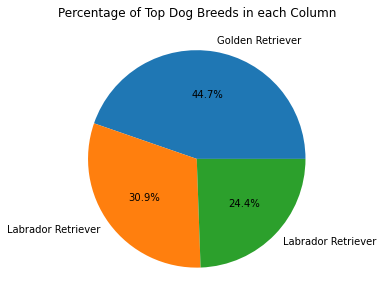

<Figure size 432x288 with 0 Axes>

In [336]:
# import matpltlib
import matplotlib.pyplot as plt
# Set up the plot
plt.figure(figsize=(5, 5))

# Define the data and labels for the pie chart
data = [df_percent_p1, df_percent_p2, df_percent_p3]
labels = ['Golden Retriever', 'Labrador Retriever', 'Labrador Retriever']

# Plot the data
plt.pie(data, labels=labels, autopct='%1.1f%%')

# Add a title
plt.title('Percentage of Top Dog Breeds in each Column')

# Show the plot
plt.show()

# Saving figure as png
plt.savefig('output.png')

### Creating a scatter plot for favorite count aganist Rating numerator

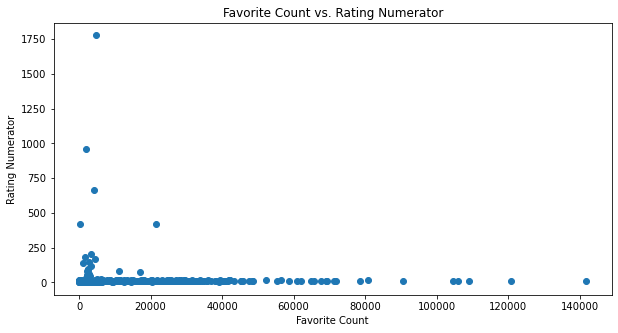

<Figure size 432x288 with 0 Axes>

In [337]:
# Extract the favorite count and rating numerator values from the selected rows


# Extract the value using indexing
favorite_count = twitter_archive_master.loc[0:2357,'favorite_count']
rating_numerator = twitter_archive_master.loc[0:2357,"rating_numerator"]


# Set up the plot
plt.figure(figsize=(10, 5))

# Plot the data as a scatter plot
plt.scatter(favorite_count, rating_numerator)

# Add a title and axis labels
plt.title('Favorite Count vs. Rating Numerator')
plt.xlabel('Favorite Count')
plt.ylabel('Rating Numerator')

# Show the plot
plt.show()

# Saving figure as png
plt.savefig('output.png')

#### There are few outliers in the rating numerator
- Calculating outliers using IQR method
- We don't need lower_fence as nothing is in -ve rating and also rating can be low which can range till 0, so calculating lower_fence and exclude less rating might be wrong representation of the data. 

In [338]:
from scipy import stats

# Extract the column of interest from the dataframe
column = twitter_archive_master['rating_numerator']

# Calculate the first and third quartiles
q1, q3 = np.percentile(column, [25, 75])

# Calculate the interquartile range
iqr = q3 - q1

# Calculate the lower and upper fences
lower_fence = q1 - 1.5 * iqr
upper_fence = q3 + 1.5 * iqr

# Identify potential outliers
outliers = column[(column > upper_fence)]

# Print the identified outliers
print(list(outliers))
print(len(outliers))

[17, 420, 666, 182, 960, 84, 24, 75, 27, 165, 1776, 204, 50, 99, 80, 45, 60, 44, 143, 121, 20, 26, 144, 88, 420]
25


### Creating scatter plot chart for retweeet count v/s favorite count 

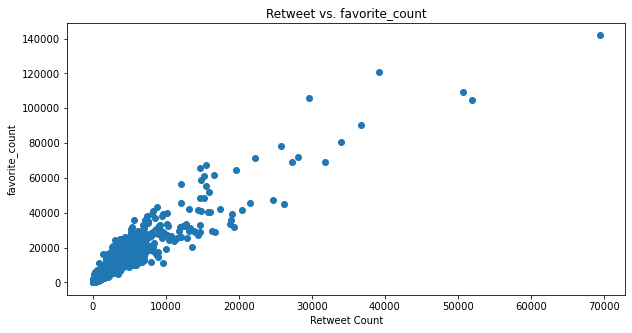

<Figure size 432x288 with 0 Axes>

In [339]:
# Extract the favorite count and rating numerator values from the selected rows


# Extract the value using indexing
retweet_count = twitter_archive_master.loc[0:2357,'retweet_count']
favorite_count = twitter_archive_master.loc[0:2357,"favorite_count"]


# Set up the plot
plt.figure(figsize=(10, 5))

# Plot the data as a scatter plot
plt.scatter(retweet_count, favorite_count)

# Add a title and axis labels
plt.title('Retweet vs. favorite_count')
plt.xlabel('Retweet Count')
plt.ylabel('favorite_count')

# Show the plot
plt.show()

# Saving figure as png
plt.savefig('output.png')